# Creative Assessment Demo

CO2 emissions have significant environmental impacts. The accumulation of CO2 in the atmosphere contributes to the greenhouse effect, trapping heat and causing global warming. This leads to various adverse effects, including rising global temperatures, sea-level rise, changes in weather patterns, and ecosystem disruptions. The long-term consequences of climate change can negatively impact human health, agriculture, biodiversity, and socio-economic systems.

Therefore, reducing CO2 emissions is crucial for mitigating climate change and minimizing its harmful effects on the environment and human well-being. This involves transitioning to cleaner and renewable energy sources, improving energy efficiency, adopting sustainable practices, and promoting conservation efforts.

Here, using a linear regression model, we find out how to design cars with less carbon emissions, which will help fight global warming and climate change.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
co2_dataframe = pd.read_csv("CO2 Emissions.csv")
co2_dataframe

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [2]:
co2_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [3]:
co2_dataframe.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


#### Changing the fuel type names to more human readable form

In [4]:
# Create a mapping dictionary to replace unique values
fuel_mapping = {
    'Z': 'Petrol',
    'D': 'Diesel',
    'X': 'Regular Gasoline',
    'E': 'Ethanol',
    'N': 'Natural Gas'
}

# Replace the values in the 'Fuel Type' column using the mapping dictionary
co2_dataframe['Fuel Type'] = co2_dataframe['Fuel Type'].replace(fuel_mapping)

# Check the updated DataFrame
print(co2_dataframe['Fuel Type'].unique())  # To verify the unique values in the 'Fuel Type' column

['Petrol' 'Diesel' 'Regular Gasoline' 'Ethanol' 'Natural Gas']


In [5]:
co2_dataframe['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [6]:
co2_dataframe['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [7]:
co2_dataframe['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [8]:
co2_dataframe['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [9]:
co2_dataframe['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'Regular Gasoline', 'Ethanol', 'Natural Gas'],
      dtype=object)

#### Performing dummy encoding on categorical variables
Categorical data consists of variables that can take on a limited, fixed set of values or categories. These categories do not have a numerical relationship between them, making it challenging to use them directly in many machine learning algorithms, which often require numerical inputs.

Dummy encoding is employed to convert categorical variables into a binary (0 or 1) format, allowing them to be used as input features for machine learning models.

In [10]:
# Perform one-hot encoding for categorical columns
co2_dataframe_encoded = pd.get_dummies(co2_dataframe, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], drop_first=True)
co2_dataframe_encoded

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_Ethanol,Fuel Type_Natural Gas,Fuel Type_Petrol,Fuel Type_Regular Gasoline
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7381,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7382,2.0,4,11.7,8.6,10.3,27,240,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7383,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [11]:
co2_dataframe_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Columns: 2145 entries, Engine Size(L) to Fuel Type_Regular Gasoline
dtypes: bool(2138), float64(4), int64(3)
memory usage: 15.5 MB


In [12]:
co2_dataframe_encoded.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


#### Reducing the dimensionality of the dataset
Performing computations on 2145 columns would take too long, so to reduce the number of columns, we use feature selection using SelectKBest technique.

SelectKBest is a feature selection technique used to choose the top k (a user-defined number) most important features from a dataset. The goal of this technique is to reduce the dimensionality of the data while retaining the most relevant features for a given machine learning task.

In feature selection, the F-statistic is used to evaluate the significance of individual features or groups of features in explaining the variability in the target variable. F-statistic is calculated by comparing the variance of the data explained by that feature to the variance that remains unexplained.

In [13]:
X = co2_dataframe_encoded.drop(columns=['CO2 Emissions(g/km)'])  # Exclude the target variable
y = co2_dataframe_encoded['CO2 Emissions(g/km)']  # Define your target variable

# Now you can perform feature selection or any other operations using X and y

In [14]:
# Select the top k features (e.g., 20) based on F-statistic
k = 20
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Create a DataFrame with the selected features
selected_features_df = X.iloc[:, selected_indices]

# Check the selected features
selected_features_df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_GMC,Make_HONDA,Make_LAMBORGHINI,Make_MINI,Make_ROLLS-ROYCE,Vehicle Class_MID-SIZE,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_VAN - PASSENGER,Transmission_A6,Transmission_AV,Fuel Type_Petrol,Fuel Type_Regular Gasoline
0,2.0,4,9.9,6.7,8.5,33,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2.4,4,11.2,7.7,9.6,29,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1.5,4,6.0,5.8,5.9,48,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,3.5,6,12.7,9.1,11.1,25,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,3.5,6,12.1,8.7,10.6,27,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7381,2.0,4,11.2,8.3,9.9,29,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7382,2.0,4,11.7,8.6,10.3,27,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7383,2.0,4,11.2,8.3,9.9,29,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [15]:
selected_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Engine Size(L)                         7385 non-null   float64
 1   Cylinders                              7385 non-null   int64  
 2   Fuel Consumption City (L/100 km)       7385 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)        7385 non-null   float64
 4   Fuel Consumption Comb (L/100 km)       7385 non-null   float64
 5   Fuel Consumption Comb (mpg)            7385 non-null   int64  
 6   Make_GMC                               7385 non-null   bool   
 7   Make_HONDA                             7385 non-null   bool   
 8   Make_LAMBORGHINI                       7385 non-null   bool   
 9   Make_MINI                              7385 non-null   bool   
 10  Make_ROLLS-ROYCE                       7385 non-null   bool   
 11  Vehi

In [16]:
selected_features_df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000


#### Skewness Visualization (Density Plot and Histogram)
Understanding the skewness (asymmetry) in your data can help build a better model as skewed data can disproportionately affect how the model turns out.

To understend the skewness of the data, we use distribution plots as shown below:

C:\Users\nixon\Desktop\Brian\4th_Sem\MP Project\venv\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\nixon\Desktop\Brian\4th_Sem\MP Project\venv\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\nixon\Desktop\Brian\4th_Sem\MP Project\venv\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\nixon\Desktop\Brian\4th_Sem\MP Project\venv\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogr

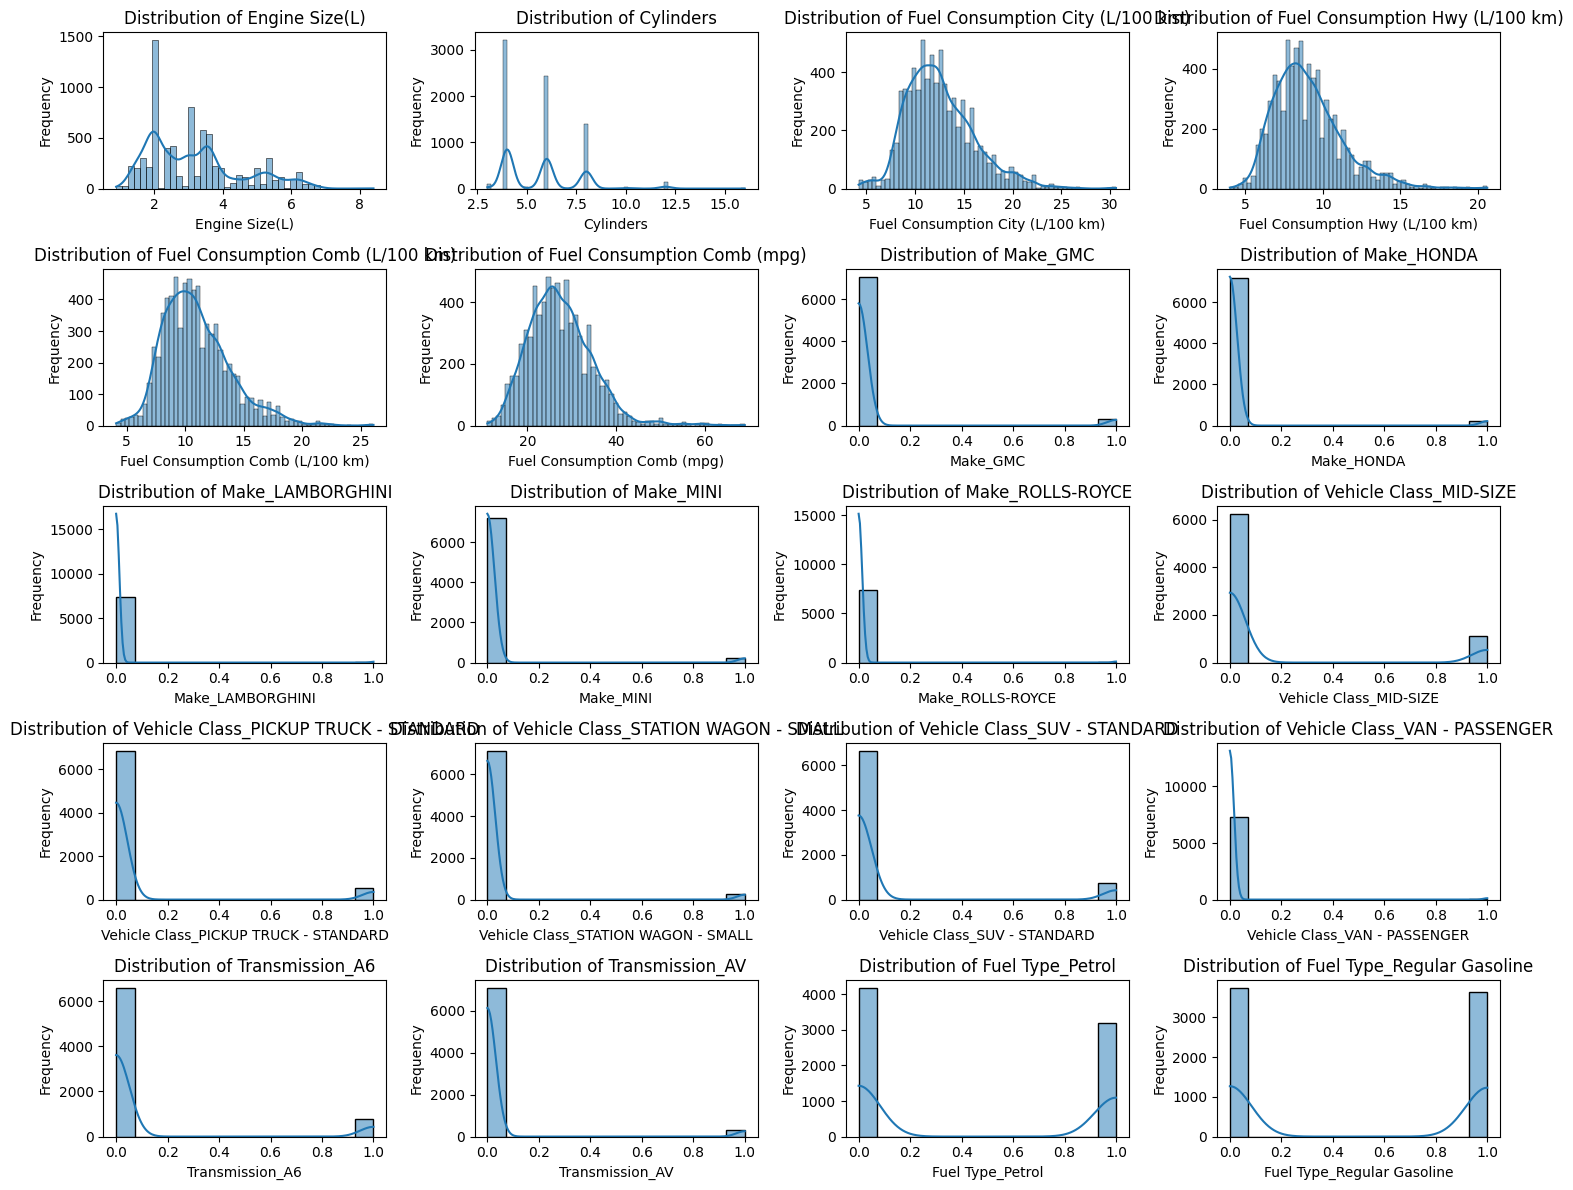

In [17]:
# Define the list of columns you want to plot
columns_to_plot = selected_features_df.columns

# Create subplots for the distribution plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through the columns and create distribution plots
for i, column in enumerate(columns_to_plot):
    sns.histplot(selected_features_df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

#### Kurtosis demonstration

Understanding kurtosis (how high the peak of the data is) can provide insights into the shape and behavior of the data distributions. It's particularly useful in assessing whether the data has extreme values or exhibits non-normal behavior.

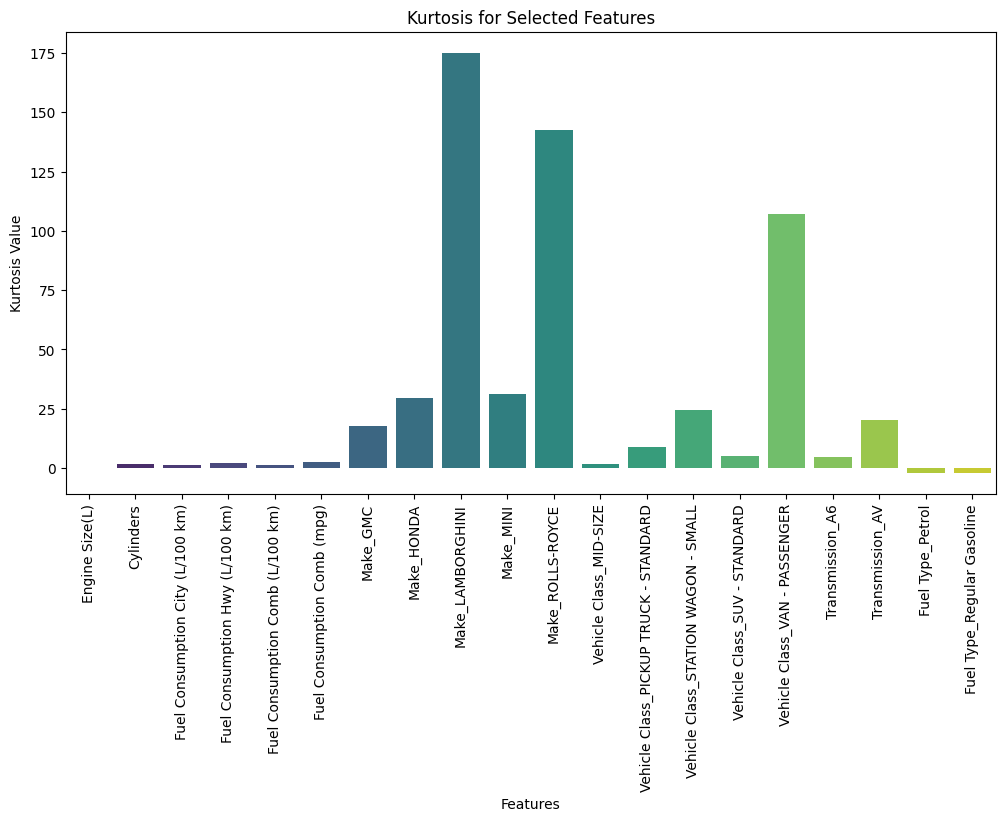

In [18]:
# Define the list of columns you want to calculate kurtosis for
columns_to_analyze = selected_features_df.columns

# Create an empty list to store kurtosis values
kurtosis_values = []

# Calculate kurtosis for each column and store the values
for column in columns_to_analyze:
    kurtosis = stats.kurtosis(selected_features_df[column])
    kurtosis_values.append(kurtosis)

# Create a bar plot to visualize kurtosis values
plt.figure(figsize=(12, 6))
sns.barplot(x=columns_to_analyze, y=kurtosis_values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Kurtosis for Selected Features')
plt.xlabel('Features')
plt.ylabel('Kurtosis Value')
plt.show()

#### Finding correlation between variables
Understanding the correlation between variables can help you find which variables affect the target variable (CO2 Emissions) the most, which helps you build a better model.

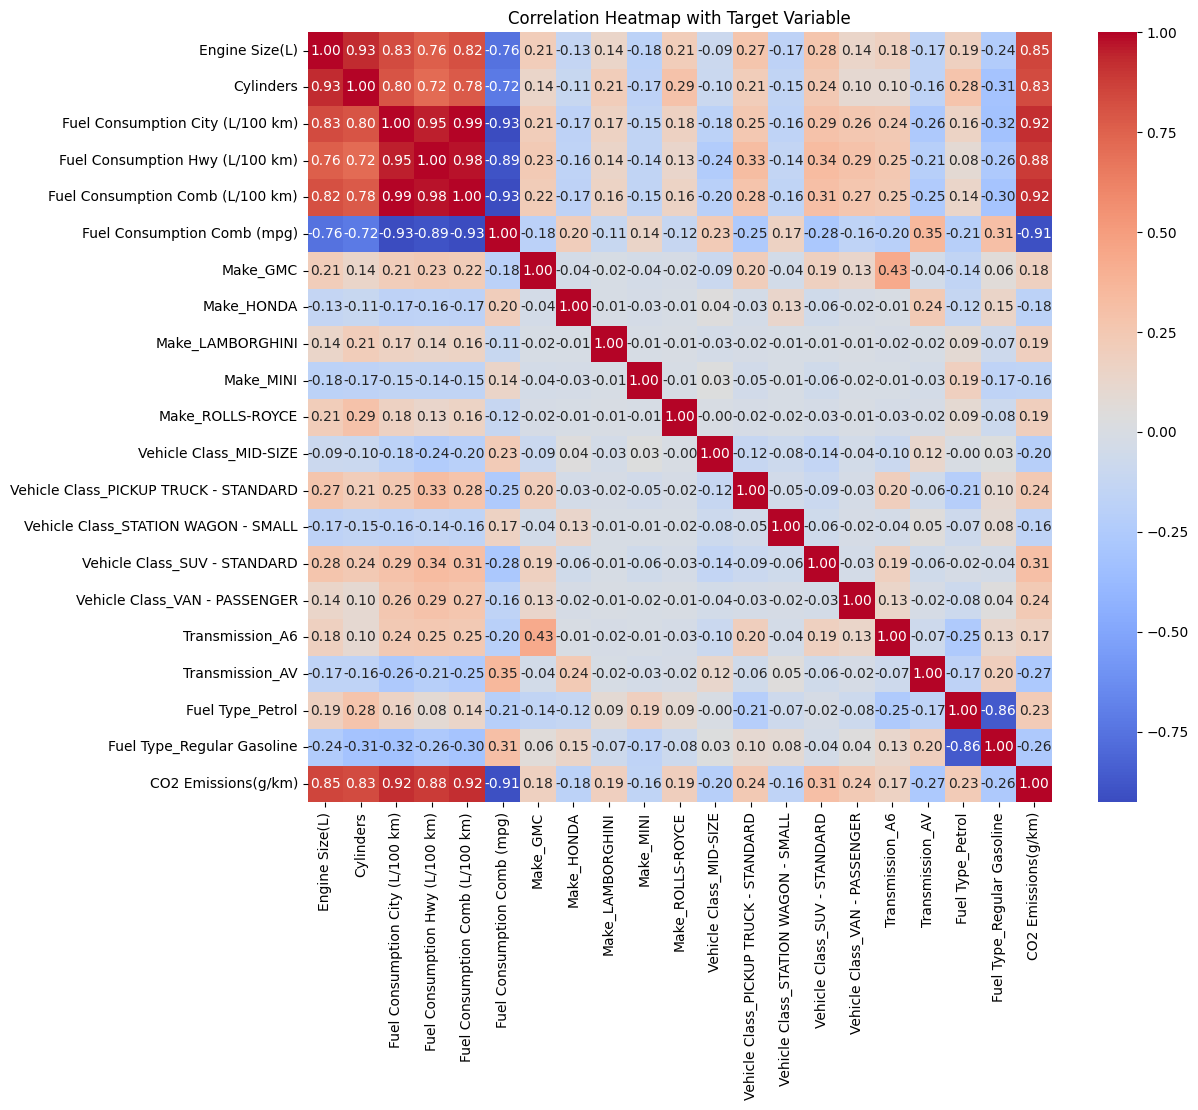

In [19]:
# Calculate correlation between variables
# Concatenate the selected features DataFrame with the target variable
selected_features_with_target = pd.concat([selected_features_df, co2_dataframe_encoded['CO2 Emissions(g/km)']], axis=1)

# Calculate the correlation matrix
correlation_matrix = selected_features_with_target.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Target Variable')

# Show the plot
plt.show()

#### Removing insignificant features
Variables with very low correlation do not affect the target variable and can therefore be dropped.

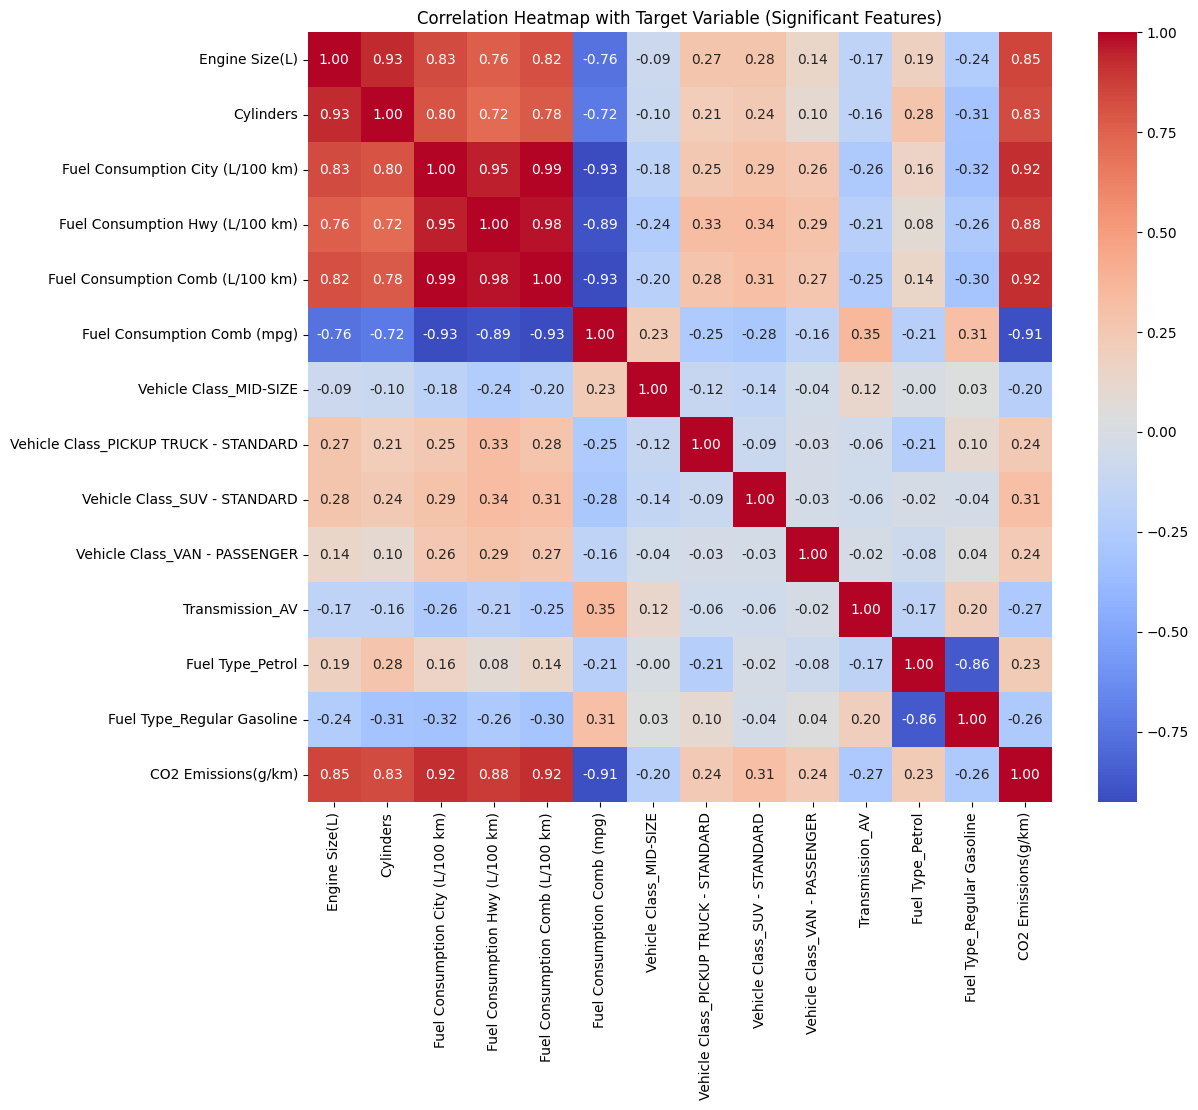

In [20]:
# Set a correlation threshold for feature selection (e.g., 0.2)
correlation_threshold = 0.2

# Find features with correlations above the threshold
significant_features = correlation_matrix['CO2 Emissions(g/km)'][abs(correlation_matrix['CO2 Emissions(g/km)']) > correlation_threshold].index.tolist()

# Create a new DataFrame with only significant features and the target variable
selected_features_with_target_significant = selected_features_with_target[significant_features]

# Calculate the new correlation matrix with significant features
correlation_matrix_significant = selected_features_with_target_significant.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the new correlation matrix
sns.heatmap(correlation_matrix_significant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Target Variable (Significant Features)')

# Show the plot
plt.show()


#### Building the linear regression model

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, co2_dataframe_encoded['CO2 Emissions(g/km)'], test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

(5908, 20)
(5908,)
Mean Squared Error: 231.9958681820985
R-squared: 0.9325520353739947


#### Evaluating the model
MSE (Mean Squared Error) measures the average of the squared differences between the actual target values and the predicted values by the model. A lower MSE indicates that the model's predictions are closer to the actual values, implying better predictive accuracy.

R-squared, also known as the coefficient of determination, quantifies the goodness of fit of a linear regression model. It represents the proportion of the variance in the target variable that is explained by the independent variables in the model. R² ranges from 0 to 1, with higher values indicating a better fit.

Since the R-squared value of our model is close to 1, it indicates that it is a good model.

#### Conclusion
From our model, we predicted that cars with smaller engine size, fewer cylinders and better fuel efficiency are needed if we are to reduce cars' impact on the environment. Car manufacturers can take these inferences and apply them in designing cars.